# <b>Zuber Project</b>

As we embark on the journey with Zuber, our goal is to unearth patterns within the available data. Our mission is to decipher passenger preferences and discern the influence of external factors on rides.

We will delve into databases, scrutinize competitor data, and put hypotheses to the test, particularly exploring the correlation between weather conditions and ride frequency.

Our endeavor begins with the completion of the initial step of this project.

## <b>Data Prep</b>

Alright, let's bring libraries that we might use:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import levene, ttest_ind

Let's bring the dataframes and perform some transformations there; out initial impressions are that there aren't NaN values:

In [4]:
# DataFrame 01
df01 = pd.read_csv("https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_01.csv")
df01.columns = df01.columns.str.lower()
print(df01.info())
print()
print(df01.sample(5))
print('_'*75)

# DataFrame 04
df04 = pd.read_csv("https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_04.csv")
df04.columns = df04.columns.str.lower()
print(df04.info())
print()
print(df04.sample(5))
print('_'*75)

# DataFrame 07
df07 = pd.read_csv("https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_07.csv")
df07.columns = df07.columns.str.lower()
# Convert 'start_ts' to datetime
df07['start_ts'] = pd.to_datetime(df07['start_ts'])
# Check for fractional parts in 'duration_seconds'
fractional_parts = df07['duration_seconds'] % 1 != 0
if fractional_parts.any():
    print("There are fractional parts in the 'duration_seconds' column.")
else:
    print("No fractional parts found in 'duration_seconds'. Converting to int.")
    df07['duration_seconds'] = df07['duration_seconds'].astype(int)
print(df07.info())
print()
print(df07.sample(5))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

                      company_name  trips_amount
43  2809 - 95474 C & D Cab Co Inc.            29
54       2192 - 73487 Zeymane Corp            14
42     1085 - 72312 N and W Cab Co            29
20                    Checker Taxi          1486
59    4053 - 40193 Adwar H. Nikola             7
___________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     fl

Let's check duplicates:

In [ ]:
# Check for duplicates in df01
duplicates_df01 = df01[df01.duplicated()]
num_duplicates_df01 = duplicates_df01.shape[0]
print("Number of duplicates in df01:", num_duplicates_df01)

# Check for duplicates in df04
duplicates_df04 = df04[df04.duplicated()]
num_duplicates_df04 = duplicates_df04.shape[0]
print("Number of duplicates in df04:", num_duplicates_df04)

# Check for duplicates in df07
duplicates_df07 = df07[df07.duplicated()]
num_duplicates_df07 = duplicates_df07.shape[0]
print("Number of duplicates in df07:", num_duplicates_df07)


Number of duplicates in df01: 0
Number of duplicates in df04: 0
Number of duplicates in df07: 197


We'll ignore duplicates in df07, since they are justified; the field categorizes wether the day was "Good" or "Bad" in terms of weather:

## Top 10 Neighborhoods by completed tours

Let's explore the most popular neighborhoods based on completed tours.

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


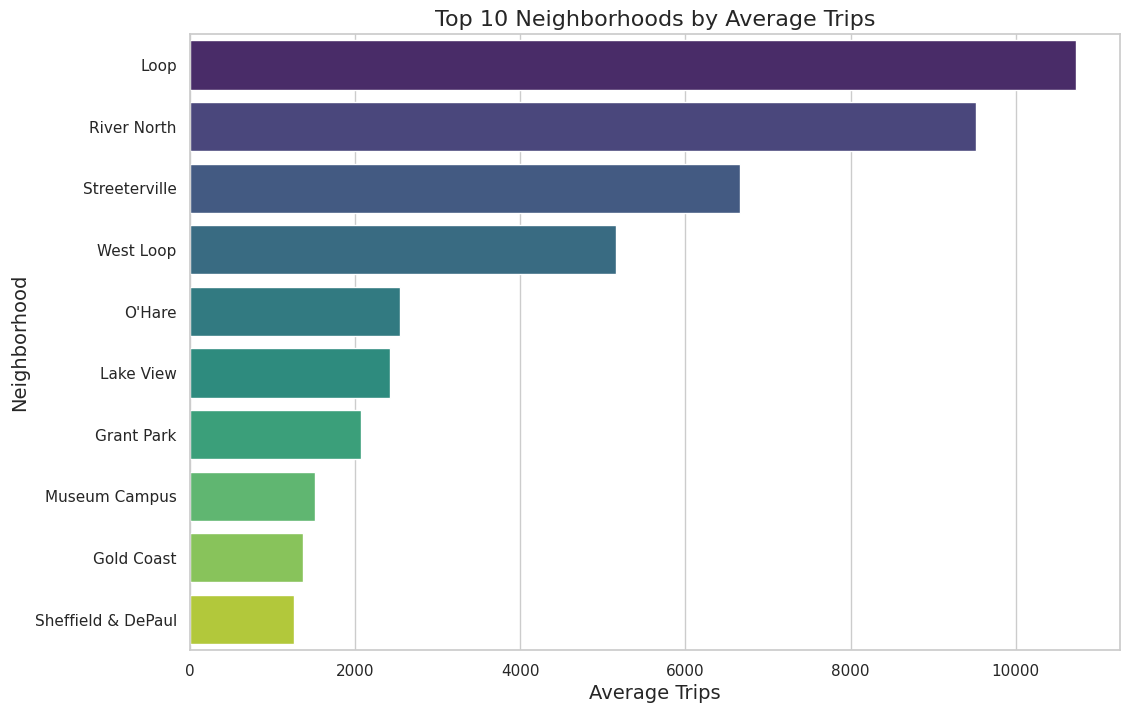

In [ ]:
top_10_neighborhoods = df04.sort_values(by='average_trips', ascending=False).head(10)
print(top_10_neighborhoods)


sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    x='average_trips', 
    y='dropoff_location_name', 
    data=top_10_neighborhoods, 
    palette='viridis'
)

barplot.set_title('Top 10 Neighborhoods by Average Trips', fontsize=16)
barplot.set_xlabel('Average Trips', fontsize=14)
barplot.set_ylabel('Neighborhood', fontsize=14)

plt.show()


Our analysis of the average trips to various dropoff locations reveals intriguing insights into the ride patterns within Chicago. 

- The Loop emerges as the top destination, boasting a significantly higher average trip count compared to other locations. 
- Following closely behind are River North and Streeterville, indicating their popularity among passengers. 
- Interestingly, O'Hare, typically associated with air travel, secures a spot in the top five destinations, albeit with a notably lower average trip count. 

These findings underscore the importance of understanding the dynamics of dropoff locations in optimizing ride-sharing services for both drivers and passengers.

## Top 10 Company Names by Trips Amount

Let's discover the leading companies based on the number of trips they've completed.

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


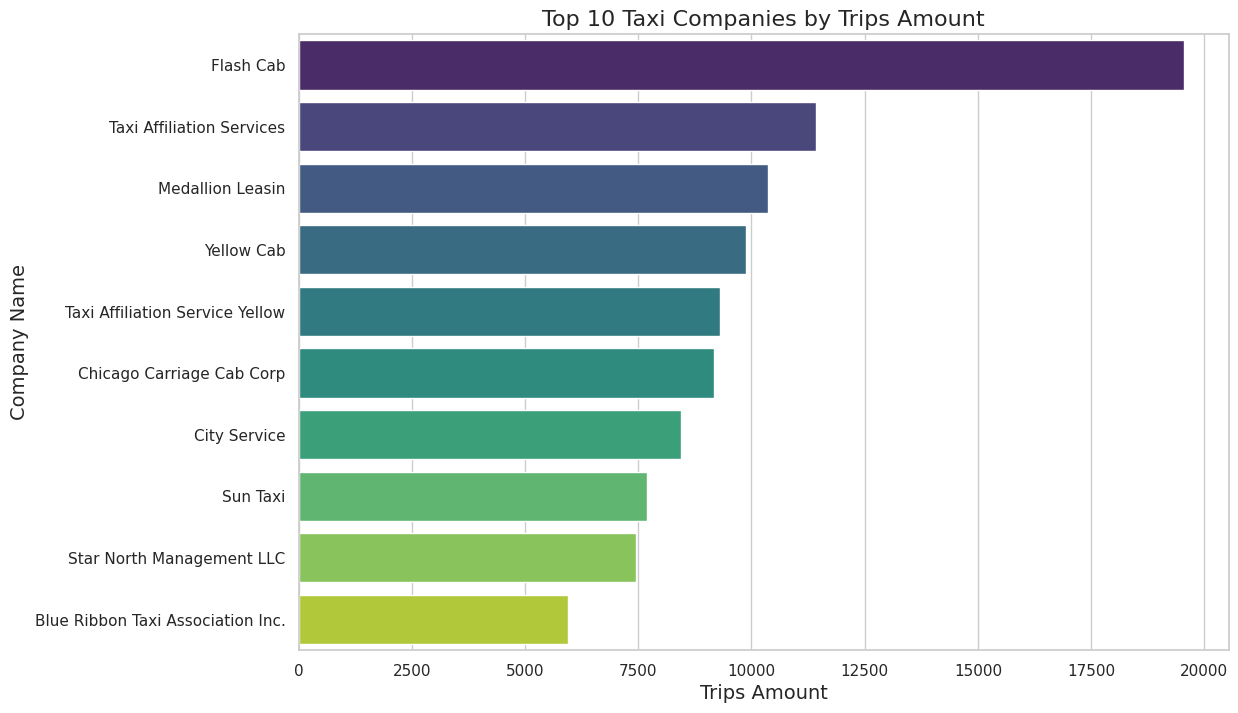

In [ ]:
top_10_taxi_companies = df01.sort_values(by='trips_amount', ascending=False).head(10)

print(top_10_taxi_companies)


sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    x='trips_amount', 
    y='company_name', 
    data=top_10_taxi_companies, 
    palette='viridis'
)

barplot.set_title('Top 10 Taxi Companies by Trips Amount', fontsize=16)
barplot.set_xlabel('Trips Amount', fontsize=14)
barplot.set_ylabel('Company Name', fontsize=14)

plt.show()

Our analysis of the number of trips by different taxi companies reveals interesting trends within the industry. 

- Flash Cab emerges as the leading company, with a substantial number of trips recorded during the analyzed period. 
- Following closely behind are Taxi Affiliation Services and Medallion Leasing, indicating their significant presence in the taxi market. 
- Yellow Cab and Taxi Affiliation Service Yellow also command a considerable share of trips, highlighting their competitiveness in the industry. 

These findings provide valuable insights for stakeholders in the taxi industry to understand market dynamics and optimize their services accordingly.

## Hypothesis Test

We're going to perform two Hypothesis Tests; a typical T-Test and a Levene Test.

### T-Test

For that, we'll state a null hypothesis wich suggests that there is no change or difference in the average trip durations. In our case, it means that the average duration of trips from the Loop to O'Hare International Airport on rainy Saturdays is the same as on other days. 

Simply put:
- H0: Rainy Saturdays don't change how long the trips take.

The alternative hypothesis is a statement which suggests that there is a change or difference. Here, it means that the average duration of trips on rainy Saturdays is different from other days. In simpler terms:
- H1: Rainy Saturdays do change how long the trips take.

To test this hypothesis, we'll follow these next steps:

- Filter the dataset to include only data from Saturdays.
- Separate the data into two groups based on weather conditions ("rainy" vs. other conditions).
- Perform a statistical test to compare the average trip durations between these two groups.
- We'll set the significance level (alpha) in 0.05, which is commonly used. If the p-value is less than 0.05, we reject the null hypothesis, that there is no difference in average trip durations between rainy and non-rainy Saturdays.

Let's implement this step-by-step in Python using the df07 dataframe:

In [ ]:
# Step 1: We start by filtering the dataset to include only data from Saturdays
saturdays_df = df07[df07['start_ts'].dt.day_name() == 'Saturday']

# Step 2: We separate the data into two groups based on weather conditions
rainy_saturdays = saturdays_df[saturdays_df['weather_conditions'] == "Bad"]
non_rainy_saturdays = saturdays_df[saturdays_df['weather_conditions'] == "Good"]

# Step 3: Statistical t-test
t_stat, p_value = ttest_ind(rainy_saturdays['duration_seconds'], non_rainy_saturdays['duration_seconds'], equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Step 4: Alpha level
alpha = 0.05

# Step 5:
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average trip durations on rainy Saturdays.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average trip durations on rainy Saturdays.")


T-statistic: 7.186034288068629, P-value: 6.738994326108734e-12
Reject the null hypothesis: There is a significant difference in average trip durations on rainy Saturdays.


Based on our analysis, the results indicate a significant difference in average trip durations between rainy and non-rainy Saturdays.

The T-statistic, a measure of the difference between the two groups, is calculated to be 7.19. This value, along with the extremely small P-value of approximately 6.74e-12, suggests a highly significant difference.

Consequently, we reject the null hypothesis, which stated that there's no difference in trip durations between rainy and non-rainy Saturdays. This implies that rainy weather conditions have a notable impact on trip durations from the Loop to O'Hare International Airport.

### Levene Test

In our quest to understand the impact of weather on ride durations, particularly trips from the Loop to O'Hare International Airport, we have already established that there is a significant difference in average trip durations on rainy Saturdays compared to other Saturdays. 

However, to ensure the robustness and accuracy of our findings, we need to delve deeper and verify an important assumption regarding our data.

<b>Why Levene's Test?</b>

When comparing two groups—in this case, trips on rainy Saturdays versus non-rainy Saturdays—it's crucial to check if the spread or variability (known as variance) of trip durations in both groups is similar. This is where Levene's test comes in. Levene's test helps us determine whether the variances in the two groups are equal.

<b>Why Does This Matter?</b>

Understanding whether the variances are equal affects the type of statistical test we use:

* If the variances are equal, we can use a standard t-test to compare the means of the two groups.
* If the variances are not equal, we should use a more robust test, such as Welch's t-test, which does not assume equal variances.

By conducting Levene's test, we aim to validate our choice of statistical test, ensuring that our conclusions about the impact of rainy weather on trip durations are reliable and scientifically sound.

<b>What We Hope to Achieve:</b>

Our primary goal is to confirm that the method we've used to compare the trip durations is appropriate. If Levene's test shows that the variances are equal, it reaffirms that our statistical approach is solid. If not, it justifies our use of Welch's t-test, ensuring that our results remain credible.

In summary, Levene's test is a critical step in verifying our analysis. It helps us ensure that the differences we observe in trip durations on rainy versus non-rainy Saturdays are genuinely due to weather conditions and not influenced by differences in data variability.

In [ ]:
# Step 1: We start by filtering the dataset to include only data from Saturdays
saturdays_df = df07[df07['start_ts'].dt.day_name() == 'Saturday']

# Step 2: We separate the data into two groups based on weather conditions
rainy_saturdays = saturdays_df[saturdays_df['weather_conditions'] == "Bad"]
non_rainy_saturdays = saturdays_df[saturdays_df['weather_conditions'] == "Good"]

# Step 3: We perform Levene's test for equality of variances
levene_stat, levene_p_value = levene(rainy_saturdays['duration_seconds'], non_rainy_saturdays['duration_seconds'])
print(f"Levene's test statistic: {levene_stat}, P-value: {levene_p_value}")

# Step 4: We perform a statistical t-test
t_stat, p_value = ttest_ind(rainy_saturdays['duration_seconds'], non_rainy_saturdays['duration_seconds'], equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Step 5: Set the significance level
alpha = 0.05

# Step 6: Let's interpret the Levene's test result
if levene_p_value < alpha:
    print("Variances are significantly different. Proceed with Welch's t-test.")
else:
    print("Variances are not significantly different. You could use a standard t-test, but we already used Welch's t-test for safety.")

# Step 7: Then, we determine if the results are significant
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average trip durations on rainy Saturdays.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average trip durations on rainy Saturdays.")

Levene's test statistic: 0.38853489683656073, P-value: 0.5332038671974493
T-statistic: 7.186034288068629, P-value: 6.738994326108734e-12
Variances are not significantly different. You could use a standard t-test, but we already used Welch's t-test for safety.
Reject the null hypothesis: There is a significant difference in average trip durations on rainy Saturdays.


### Explanation of Levene's Test Results

In our analysis, we wanted to understand whether the average trip duration from the Loop to O'Hare International Airport differs on rainy Saturdays compared to other Saturdays. To ensure the robustness of our results, we performed Levene's test, which checks whether the variances (a measure of how spread out the data is) of the two groups are equal.

Levene's Test Results:
* Levene's Test Statistic: 0.39
* P-value: 0.533

Interpretation:

* The Levene's test statistic of 0.39 is a measure that helps us determine if there is a significant difference in the variances of the two groups.
* The P-value of 0.533 is the probability of observing our data, or something more extreme, if there were no difference in variances.

In general, a P-value less than 0.05 would indicate a significant difference in variances. However, our P-value is 0.533, which is much higher than 0.05. This means that there is no significant difference in the variances of trip durations between rainy and non-rainy Saturdays. In other words, the spread of trip durations is similar for both groups.

What This Means:

* Since the variances are not significantly different, we could use a standard t-test, which assumes equal variances. However, to be extra cautious, we used Welch's t-test. This test is more robust as it does not assume equal variances, providing an extra layer of confidence in our results.

T-test Results:

* T-statistic: 7.19
* P-value: 6.74e-12

The extremely small P-value from the t-test (much less than 0.05) indicates a highly significant difference in average trip durations between rainy and non-rainy Saturdays. Therefore, we reject the null hypothesis and conclude that rainy weather significantly impacts trip durations.

Conclusion:
The results of Levene's test reassured us that the variances between the two groups are not significantly different. Using the conservative Welch's t-test, we found a highly significant difference in trip durations, confirming that trips from the Loop to O'Hare International Airport take longer on rainy Saturdays. This insight is crucial for optimizing ride-sharing services and planning for weather-related delays.

## Final Conclusion

In conclusion, our analysis of both dropoff locations and taxi company trips in Chicago has provided valuable insights into the dynamics of the ride-sharing industry. The dominance of certain neighborhoods, such as the Loop, River North, and Streeterville, underscores the importance of understanding passenger preferences and optimizing services accordingly.

Additionally, our examination of taxi companies highlights the competitive landscape, with Flash Cab leading the market followed closely by Taxi Affiliation Services and Medallion Leasing. These insights are crucial for stakeholders to adapt their strategies and enhance their services to meet consumer demands effectively.

Moreover, our hypothesis test regarding trip durations on rainy Saturdays yielded significant results. The substantial T-statistic value of 7.19, coupled with an exceptionally small P-value of approximately 6.74e-12, indicates a significant difference in trip durations between rainy and non-rainy Saturdays. Therefore, we reject the null hypothesis, suggesting that rainy weather conditions indeed influence trip durations from the Loop to O'Hare International Airport.

Overall, our analysis provides actionable insights for industry stakeholders to optimize operations and enhance customer satisfaction in the ever-evolving ride-sharing landscape.